## О ноутбуке

В этом ноутбуке рассматривается задача классификации видов пингвинов из датасета Palmer Penguins с помощью алгоритма KNN. 

В нем представлены:  
- предобработка данных  
- обучение моделей KNN с разным числом соседей
- визуализация решающих поверхностей
- реализация KNN своими руками

## О данных

В этом ноутбуке мы будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



## Предобработка данных

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV

import warnings
warnings.filterwarnings("ignore")

In [47]:
data = pd.read_csv('penguins_data.csv')
pd.set_option('display.max_columns', None)
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Date Egg             344 non-null    int64  
 4   Culmen Length (mm)   342 non-null    float64
 5   Culmen Depth (mm)    342 non-null    float64
 6   Flipper Length (mm)  342 non-null    float64
 7   Body Mass (g)        342 non-null    float64
 8   Sex                  334 non-null    object 
 9   Delta 15 N (o/oo)    330 non-null    float64
 10  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 29.7+ KB


Всего в датасете 344 объекта, а значит есть пропуски во всех признаках кроме "Species", "Island", "Clutch Completion" и "Date Egg".

Для начала просто удалим все объекты со значением NaN:

In [49]:
data = data.dropna().reset_index(drop=True)

В числовых признаках могут быть неявные пропуски - например просто вместо значения поставили ноль, или наоборот, случайно дописали цифру и получилось очень большое число.

In [50]:
data.describe()

,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,354.716923,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,294.029004,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,0.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,15.000000,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,385.000000,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,733.000000,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,753.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


Максимумы и минимумы значений выглядят вполне естественно, без аномалий.

Проверим пропуски в категориальных данных, всего у нас 4 категориальных признака - "Species", "Island", "Clutch Completion" и "Sex". В них нет NaN (поскольку мы удалили их ранее), но пропуски могут быть неявными, например может быть написано "None", поэтому проверим их дополнительно.

In [51]:
print(data["Species"].value_counts())
print()
print(data["Island"].value_counts())
print()
print(data["Clutch Completion"].value_counts())
print()
print(data["Sex"].value_counts())

Species
Adelie       139
Gentoo       119
Chinstrap     67
Name: count, dtype: int64

Island
Biscoe       163
Dream        119
Torgersen     43
Name: count, dtype: int64

Clutch Completion
Yes    291
No      34
Name: count, dtype: int64

Sex
FEMALE    163
MALE      161
.           1
Name: count, dtype: int64


Как мы видим есть пропуски в столбце "Sex" - 1 объект с "." вместо пола, остальные категориальные признаки действительно не содержат пропусков.

In [52]:
omissions = data[data["Sex"] == "."]
omissions

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
39,Gentoo,Biscoe,Yes,0,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444


In [ ]:
data.drop(omissions.index, inplace=True)
data.info()

Пропуски удалены. Теперь закодируем категориальные признаки, не считая целевую переменную всего их 3. Применим OneHotEncoding, так мы избежим добавления **порядка**, там где его нет (мы же не можем сказать что какой то остров лучше другого). Поскольку мы удалям один столбец при OHE (чтобы избежать линейной зависимости), то в случае с столбцами, которые принимают только два значения ("Sex", "Clutch Completion") мы не создаем новых столбцов.

In [55]:
data = pd.get_dummies(data, columns=["Island", "Sex", "Clutch Completion"], drop_first=True)
data.rename(columns={'Sex_MALE': 'Sex_Male', 'Clutch Completion_Yes': 'Clutch Completion'}, inplace=True) #для удобства
data

,Species,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Sex_Male,Clutch Completion
0,Chinstrap,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,True
1,Chinstrap,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,False,True
2,Gentoo,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,False,True
3,Chinstrap,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,False,True
4,Gentoo,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
320,Chinstrap,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,False,True
321,Adelie,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,True,True
322,Adelie,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,False,False,False,True
323,Gentoo,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,False,True


Целевую категориальную переменную закодируем в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2.  Также сохраним информацию о признаках в переменную `X`, а о целевой переменной – в переменную `y`.

In [10]:
data["Species"] = OrdinalEncoder(categories=[["Chinstrap", "Gentoo", "Adelie"]]).fit_transform(data[["Species"]]).astype(int)

X = data.drop(["Species"], axis=1)
y = data["Species"]

## Визуализация решающих поверхностей в KNN

### Шаг 1

Разделим выборку на тренировочную и тестовую, долю тестовой выборки зададим равной 0.3. Параметр stratify необходим для того чтобы пропорции классов в test и train были одинаковыми.

In [11]:
np.random.seed(52)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=52)

### Шаг 2

На тренировочной выборке обучим шесть классификаторов KNN, отличающихся числом соседей. Для первого классификатора число соседей поставим равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25. Для обучения будем использовать только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Также промасштабируем признаки при помощи модуля `StandardScaler`, чтобы не добавлять важности признакам.

In [12]:
scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train[['Flipper Length (mm)', 'Body Mass (g)']])
X_test_2 = scaler.transform(X_test[['Flipper Length (mm)', 'Body Mass (g)']])

classifiers = []

for n in [1, 3, 5, 10, 15, 25]:
    knn = KNeighborsClassifier(n_neighbors = n, p=2)
    knn.fit(X_train_2, y_train)
    
    train_accuracy = knn.score(X_train_2, y_train)
    test_accuracy = knn.score(X_test_2, y_test)

    classifiers.append(knn)
    
    print(f'k = {n}: Train accuracy = {train_accuracy:.3f}, Test accuracy = {test_accuracy:.3f}')


k = 1: Train accuracy = 0.960, Test accuracy = 0.806
k = 3: Train accuracy = 0.845, Test accuracy = 0.786
k = 5: Train accuracy = 0.823, Test accuracy = 0.776
k = 10: Train accuracy = 0.810, Test accuracy = 0.847
k = 15: Train accuracy = 0.814, Test accuracy = 0.827
k = 25: Train accuracy = 0.805, Test accuracy = 0.806


### Шаг 3

Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. 

In [13]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Построим сетку графиков для обученных выше классификаторов:

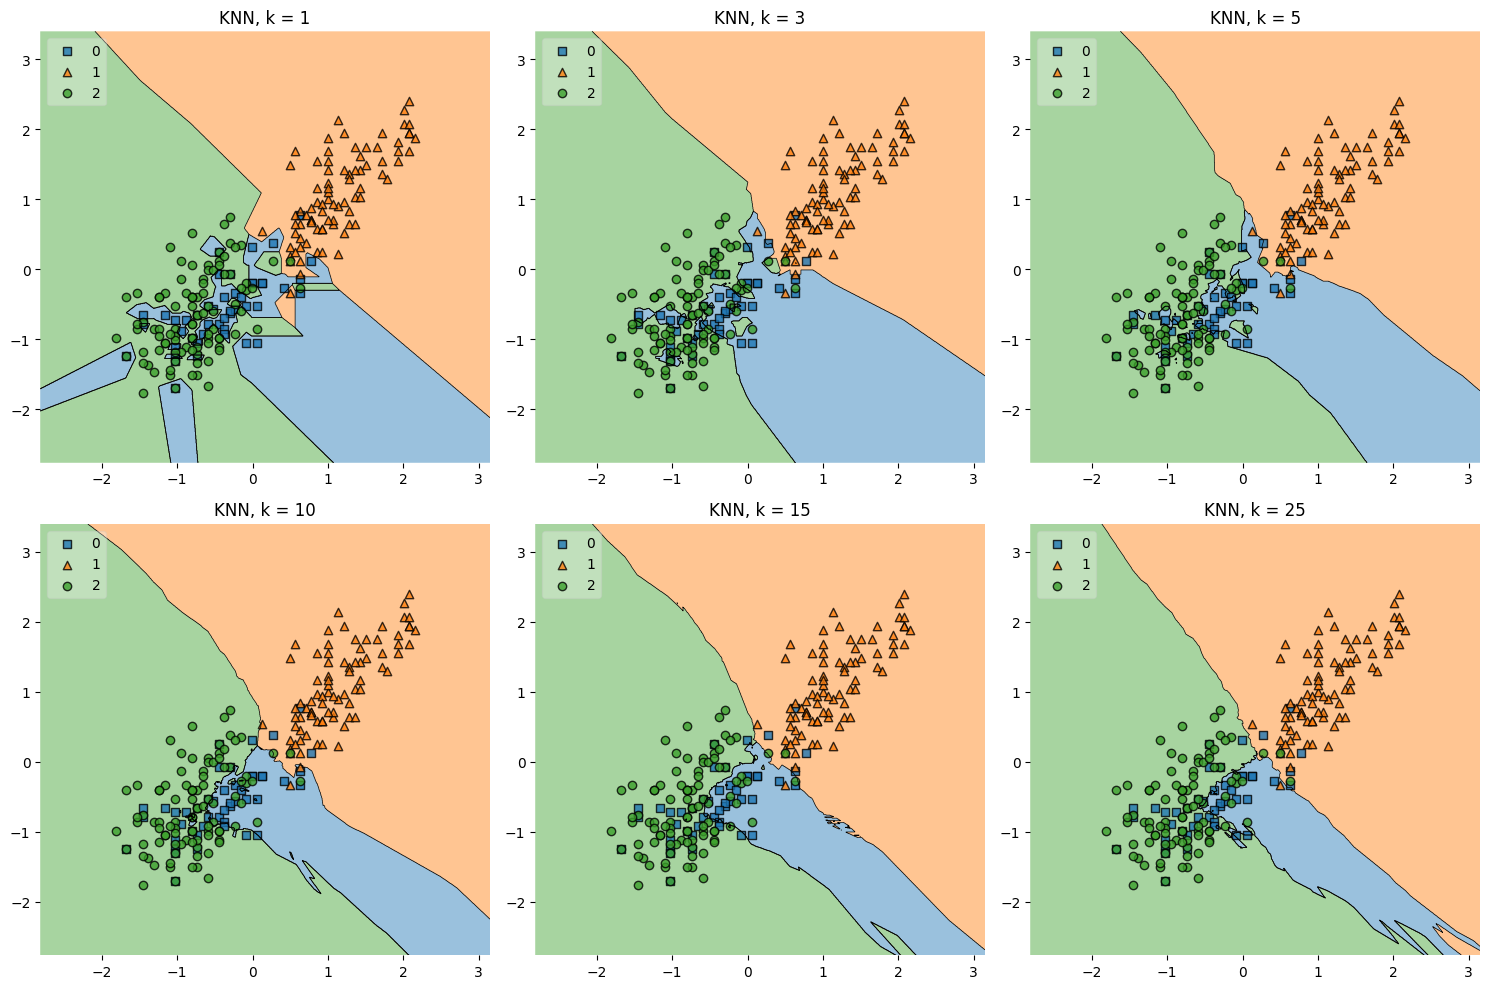

In [15]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
    
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)

for idx, clf in enumerate(classifiers):
    ax = fig.add_subplot(gs[idx])
    plot_decision_regions(X=X_train_2, y=y_train.to_numpy(), clf=clf, legend=2)
    ax.set_title(f'KNN, k = {[1, 3, 5, 10, 15, 25][idx]}')

plt.tight_layout()
plt.show()


Как мы поняли ранее, самая большая точность на тесте получается при k = 10. Можно заметить что при k меньше 10 на графике на лицо переобучение - можно заметить островки разного цвета вокруг объектов, которые уменьшают ошибку на обучающей выборке, но вместе с этим модель теряет обобщающую способность. При k больше 10 модель излишне сглаживает границы, теряя важные детали, что уменьшает точность. При k=10 достигается баланс между переобучением и обобщающей способностью.

## KNN своими руками

### Шаг 1

В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

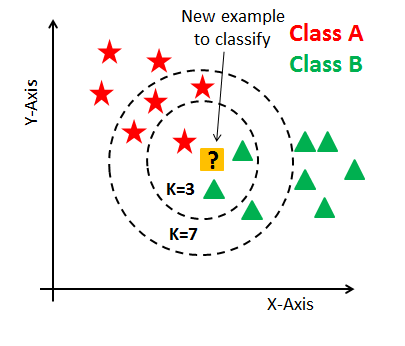

In [16]:
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def count_distance(self, x, y):
        return np.linalg.norm(x - y, axis=1) # считаем евклидову норму разниц координат

    def predict(self, X_test):
        predictions = []

        for x in X_test:
            distances = self.count_distance(x, self.X_train) # счиатем расстояние между точкой из теста и всеми точками из трейна
            k_nearest_objects = np.argsort(distances)[:self.k] # сортируем по расстоянию, берем индексы, и берем ближайшие k объектов
            k_nearest_targets = self.y_train[k_nearest_objects] # берем классы ближайших k объектов
            prediction = Counter(k_nearest_targets).most_common(1)[0][0] # находим самый встречающийся класс
            predictions.append(prediction)

        return np.array(predictions)


In [ ]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
test_knn(KNN)

Все тесты пройдены, а значит алгоритм реализован верно!

### Шаг 2

Протестируем наш алгоритм на данных о пингвинах и выведем лучший получившийся результат на тестовой выборке.

In [19]:
for n in range(1, 25):
    knn = KNN(n)
    knn.fit(X_train_2, y_train.to_numpy())
    
    train_accuracy = accuracy_score(y_train, knn.predict(X_train_2))
    test_accuracy = accuracy_score(y_test, knn.predict(X_test_2))
    
    print(f'k = {n}: Train accuracy = {train_accuracy}, Test accuracy = {test_accuracy}')

k = 1: Train accuracy = 0.9557522123893806, Test accuracy = 0.7857142857142857
k = 2: Train accuracy = 0.9557522123893806, Test accuracy = 0.7857142857142857
k = 3: Train accuracy = 0.8407079646017699, Test accuracy = 0.7653061224489796
k = 4: Train accuracy = 0.9026548672566371, Test accuracy = 0.7755102040816326
k = 5: Train accuracy = 0.8407079646017699, Test accuracy = 0.7755102040816326
k = 6: Train accuracy = 0.8849557522123894, Test accuracy = 0.7959183673469388
k = 7: Train accuracy = 0.8407079646017699, Test accuracy = 0.7959183673469388
k = 8: Train accuracy = 0.8584070796460177, Test accuracy = 0.7857142857142857
k = 9: Train accuracy = 0.8008849557522124, Test accuracy = 0.8061224489795918
k = 10: Train accuracy = 0.8230088495575221, Test accuracy = 0.8367346938775511
k = 11: Train accuracy = 0.8141592920353983, Test accuracy = 0.826530612244898
k = 12: Train accuracy = 0.827433628318584, Test accuracy = 0.826530612244898
k = 13: Train accuracy = 0.8185840707964602, Test ac

Лучший результат на тестовой выборке: 0.837 при k = 10 (такой же результат как и при использовании классификатора из sklearn)